## Time series anallysis on Peyton Manning data

A look at a time series of the log daily page views for the Wikipedia page for Peyton Manning. 

In [1]:
# Import libraries
import pandas as pd
from fbprophet import Prophet

In [2]:
# Load Peyton Manning data
data = pd.read_csv('../data/example_wp_log_peyton_manning.csv')
data.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [3]:
data.describe()

,y
count,2905.000000
mean,8.138958
std,0.845957
min,5.262690
25%,7.514800
50%,7.997999
75%,8.580168
max,12.846747


In [4]:
# Train model
model = Prophet() # Prophet uses a linear model for its forecast by default
model.fit(data)   # pass in the historical data

/Users/chrisjcc/.virtualenvs/ml/lib/python3.7/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
# Predictions are then made on a data with a column ds containing 
# the dates for which a prediction is to be made
future = model.make_future_dataframe(periods=365) # extends into the future a specified number of days 
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


The predict method will assign each row in future a predicted value which it names yhat. And a new column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [6]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.206497,7.445688,8.912171
3266,2017-01-16,8.531523,7.781775,9.264209
3267,2017-01-17,8.318930,7.576214,9.062766
3268,2017-01-18,8.151543,7.430860,8.862705
3269,2017-01-19,8.163477,7.365268,8.863212


Plot the forecast by passing in forecast data

/Users/chrisjcc/.virtualenvs/ml/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


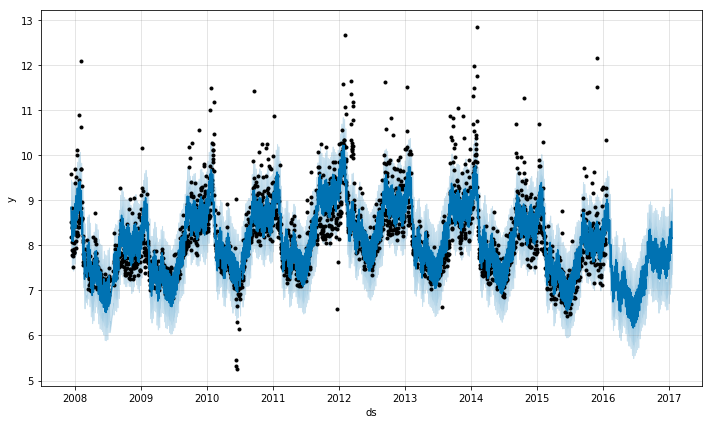

In [7]:
fig1 = model.plot(forecast)

To see the forecast components we can use the plot_components method, by default we’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If we include holidays, we’ll see those here, too.

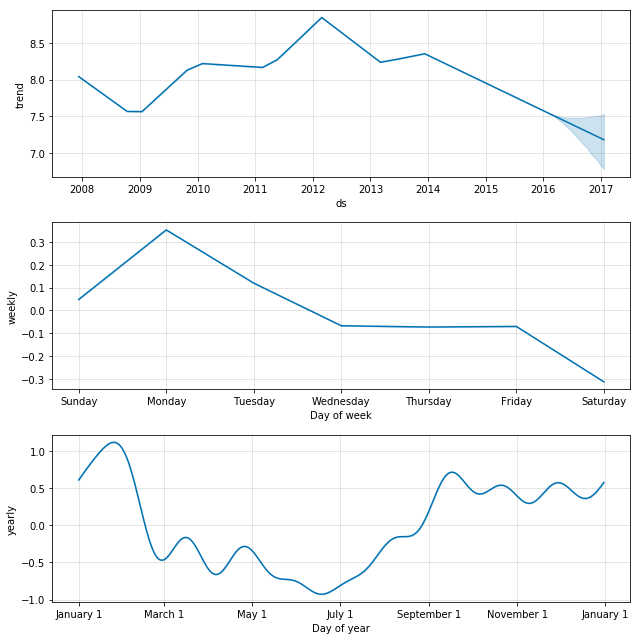

In [8]:
fig2 = model.plot_components(forecast)

## Saturating Forecasts

When forecasting growth, there is usually some maximum achievable point, e.g. total market size, total population size, etc. This is called the carrying capacity, and the forecast should saturate at this point. Prophet allows you to make forecasts using a logistic growth trend model, with a specified carrying capacity. 

In [9]:
# Specify the carrying capacity in a column cap (can be an increasing sequence if the market size is growing)
data['cap'] = 8.5 # usually be set using data or expertise about the market size.

In [10]:
logistic_model = Prophet(growth='logistic')
logistic_model.fit(data)

/Users/chrisjcc/.virtualenvs/ml/lib/python3.7/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


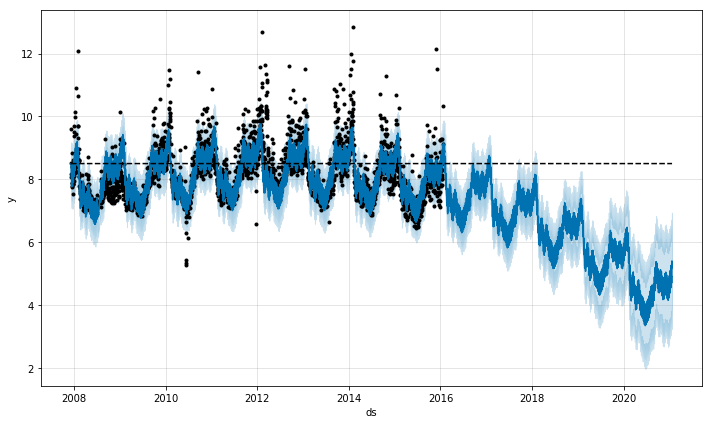

In [12]:
future = logistic_model.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = logistic_model.predict(future)
fig  = logistic_model.plot(fcst)

The logistic function has an implicit minimum of 0, and will saturate at 0 the same way that it saturates at the capacity. It is possible to also specify a different saturating minimum.

### Saturating Minimum

The logistic growth model can also handle a saturating minimum, which is specified with a column floor in the same way as the cap column specifies the maximum.

/Users/chrisjcc/.virtualenvs/ml/lib/python3.7/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


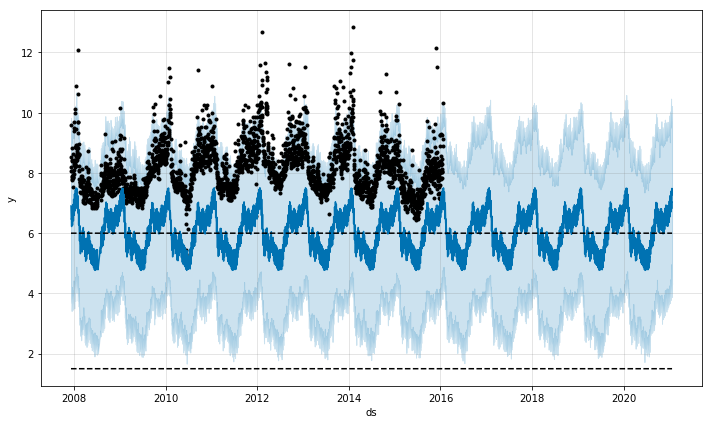

In [14]:
data['y']       = 10 - data['y']
data['cap']     = 6
data['floor']   = 1.5
future['cap']   = 6
future['floor'] = 1.5

logistic_model = Prophet(growth='logistic')
logistic_model.fit(data)
fcst = logistic_model.predict(future)
fig  = logistic_model.plot(fcst)

To use a logistic growth trend with a saturating minimum, a maximum capacity must also be specified.

/Users/chrisjcc/.virtualenvs/ml/lib/python3.7/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


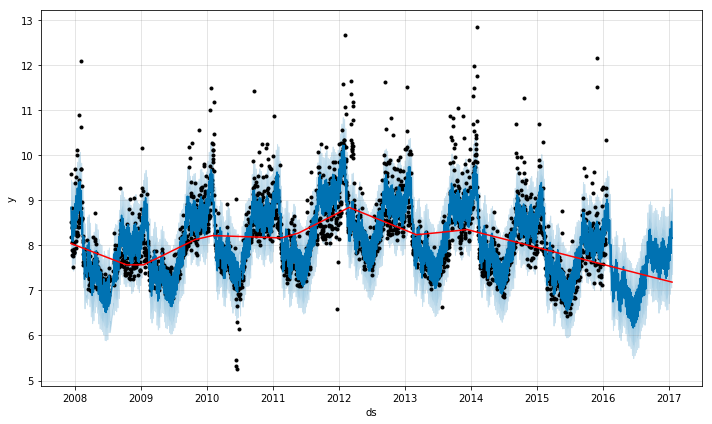

In [17]:
# Plot change point
from fbprophet.plot import add_changepoints_to_plot

m = Prophet(changepoint_range=0.9)
m.fit(data)

fig = logistic_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), logistic_model, forecast)

In [ ]:
# Python
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

In [ ]:
# Python
m = Prophet(changepoint_prior_scale=0.001)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

In [ ]:
# Python
m = Prophet(changepoints=['2014-01-01'])
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)